Your task: fit a plane through a set points in 3D
Points are given as a vector of numpy.array

Let's first generate the points

[array([4.49383459, 0.1664735 , 2.41302279]), array([ 7.35952705, -9.30492532, -0.49630204]), array([-4.63749361,  1.58484744,  0.22325114]), array([9.02178443, 7.07275062, 6.55017241]), array([3.42124784, 1.00117398, 2.40187124])]


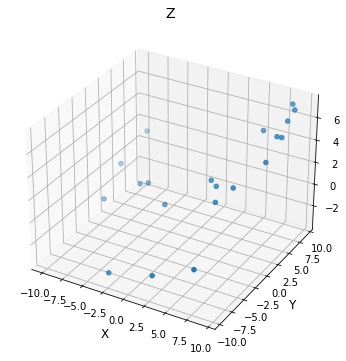

In [16]:
# true parameters of the plane (z0,dzdx,dzdy)
planepars = [ 1, 0.3, 0.4 ]

# z-resolution
sigmaz    = 0.01

# x and y range
xrange = (-10,10)
yrange = (-10,10)

# number of generated points
numpoints = 20

# generate the points
# (there are much more efficient ways to do this, but like this we can hopefully all read it)
points = []
import numpy as np
from numpy import random
for i in range(numpoints):
    x = xrange[0] + random.rand()*(xrange[1]-xrange[0])
    y = yrange[0] + random.rand()*(yrange[1]-yrange[0])
    ztrue = planepars[0] + x * planepars[1] + y * planepars[2]
    z = ztrue + sigmaz*random.normal()
    points.append( np.array([x,y,z]) )
#print the first few points
print(points[0:5])

# display the points
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Z",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
xarray = [ p[0] for p in points ]
yarray = [ p[1] for p in points ]
zarray = [ p[2] for p in points ]

# scatter with colormap mapping to z value
ax.scatter(xarray,yarray,zarray, marker='o')


Your task is now to extract the original parameters from the fit to the list of 'points' (x,y,z).
The model is 

```z(x,y) = p0 + p1*x + p2*y ```

where p0, p1, and p3 are the three parameters. 

The steps are:
* define a structure for your parameters, for the chi2, and for the chi2 derivatives, for instance
```
alpha = np.array( [0,0,0] )  # initial parameters. you can choose these as you like: for a linear fit it does not matter.
chi2  = 0.0                       # will hold the sum of the chi2 contributions
dChi2dAlpha   = np.zeros( 3 )     # first derivative of chi2 to parameters (a vector)
d2Chi2dAlpha2 = np.zeros( 3, 3 )  # second derivative of chi2 to parameters (a 3x3 matrix)
```
* loop over the points and fill the contributions to chi2 and derivatives. the 'sigma' for the measurements can be found above.
* solve the linear system either by inverting the second derivative 
```
   d2Chi2dAlpha2Inv = np.linalg.inv(d2Chi2dAlpha2)
   deltaalpha       = - d2Chi2dAlpha2Inv.dot(dChi2dAlpha)
```
   or by using np.linalg.solve (which also does something sensible of your matrix is not invertible)
```
   deltaalpha        = - np.linalg.solve( d2Chi2dAlpha2, self.dChi2dAlpha )
```
* compute also the covariance matrix for alpha and the chi2 /after/ the fit.
  (for the latter you could either rerun the loop with the new value of alpha, or you apply the formula from the lecture.)
* if you have time left, plot the distribution of the residuals in z
  ```
      residual = z_measured - z_fitted(x,y)
  ```
  If the number points is small, you will find that this is narrower than sigmaz. Why is this?
